Kornpob Bhirombhakdi, kbhirombhakdi@stsci.edu

# Story
We will combine X01 G102 spectra at epochs 201911 and 202001. We will simply stack them, sort, and produce a smooth version in an additional column. Also, include dateobs column to distinguish the entries. Last, save a new file. Name convention: ./X01_together_G102/*.

# Previously
X01 201911 G102 and 202001 were extracted and calibtrated in 20200824/X01_201911_G102_rebkg/flam_halfdy3.csv and 20200826/X01_202001_G102/flam_halfdy3.csv, respectively. We showed in 20200826/02 that both extractions were consistent to its photometry and to each other.

# Resources
- 20200824/X01_201911_G102_rebkg/flam_halfdy3.csv
- 20200826/X01_202001_G102/flam_halfdy3.csv
- ./20200821/X01_mag.csv


In [64]:
from hstgrism.container import Container
from hstphot.mag2flux import mag2flux
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
identifier = 'X01_together_G102'
cobj = Container(identifier,identifier,'pdf',False) # to make folder


/Users/kbhirombhakdi/anaconda3/envs/py3/lib/python3.7/site-packages/hstgrism/container.py:31: UserWarning: Folder X01_together_G102 already exists. To create a fresh folder, set overwrite = True
  warnings.warn(string)


In [65]:
file_dict = {'201911':'../20200824/X01_201911_G102_rebkg/flam_halfdy3.csv',
             '202001':'../20200826/X01_202001_G102/flam_halfdy3.csv',
            }
for ii,i in enumerate(file_dict):
    if ii==0:
        t = pd.read_csv(file_dict[i])
        t['dateobs'] = np.full_like(t.ww.values,i,dtype=object)
        
    else:
        tt = pd.read_csv(file_dict[i])
        tt['dateobs'] = np.full_like(tt.ww.values,i,dtype=object)
        t = t.append(tt)
t.sort_values(by=['ww'],inplace=True)
flam = copy.deepcopy(t)


Save ./X01_together_G102/X01_together_G102.csv


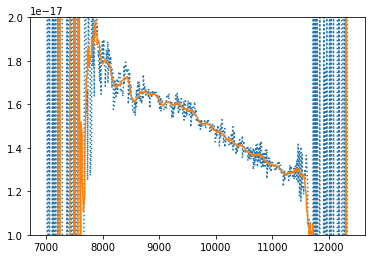

In [81]:
window_length = 11
polyorder = 0
##### try #####
ty = savgol_filter(flam.flam.values,window_length=window_length,polyorder=polyorder)
plt.figure()
plt.plot(flam.ww,flam.flam,':')
plt.plot(flam.ww,ty,'-')
plt.ylim(1e-17,2e-17)
##### save #####
flam['flam_smooth'] = ty.copy()
string = './{0}/{0}.csv'.format(identifier)
flam.to_csv(string)
print('Save {0}'.format(string))


# Plot

In [82]:
flam = pd.read_csv('./{0}/{0}.csv'.format(identifier))
wavebound = {'G102':(7500.,12000.)}


In [83]:
mag = pd.read_csv('../20200821/X01_mag.csv')
mag_id = mag.identifier.values
mag_ww = mag.wavelength.values
mag_abmag = mag.ABmag.values
mag_emag = mag.emag.values


Save ./X01_together_G102/X01_together_G102.pdf


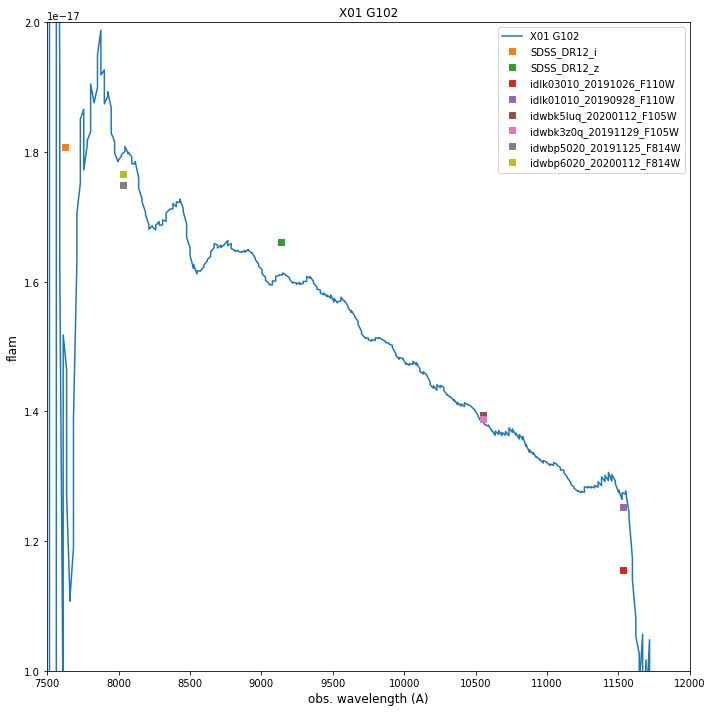

In [84]:
plt.figure(figsize=(10,10))
tx,ty = flam.ww.values,flam.flam_smooth.values
m = np.argwhere((tx >= wavebound['G102'][0])&(tx <= wavebound['G102'][1])).flatten()
plt.plot(tx[m],ty[m],label='X01 G102')
##### photometry #####
for ii,i in enumerate(mag_id):
    ty = mag2flux(mag_abmag[ii],mag_emag[ii],mag_ww[ii])
    if (mag_ww[ii] >= wavebound['G102'][0]) and (mag_ww[ii] <= wavebound['G102'][1]):
        plt.plot(mag_ww[ii],ty[0],'s',label=mag_id[ii])
##########
plt.legend(fontsize=10,bbox_to_anchor=(1.,1.))
plt.xlim(wavebound['G102'][0],wavebound['G102'][1])
plt.ylim(1e-17,2e-17)
plt.xlabel('obs. wavelength (A)',fontsize=12)
plt.ylabel('flam',fontsize=12)
plt.title('X01 G102',fontsize=12)
plt.tight_layout()
string = './{0}/{0}.pdf'.format(identifier)
plt.savefig(string,plotformat='pdf',bbox_inches='tight')
print('Save {0}'.format(string))


# Summary
This concluded the task. Note that we applied savgol_filter with window_length and polyorder as specified. We tested with the combinations of length {11,21} and polyorder {0,1}, the results were insignificantly different, and were consistent with the photometry.
